In [25]:
from dataloader import *
from models import *
from trainer import *
from evaluator import *
from create_h5 import *
import json

# binary

In [11]:
with open('./config_binary.json', 'r') as f:
    config = json.load(f)

data_path = config['data_path']
weights_path = config['weights_path']
prediction_path = config['prediction_path']

model_type = config['model_type']
tissue = config['tissue']
histones = config['histones']

batch_size = config['batch_size']
num_epochs = config['num_epochs']
lr = config['lr']
earlystop_thresh = config['earlystop_thresh']

In [12]:
# data_dir = f'{data_path}/{tissue}/binary_cont'
# create_hdf5(data_dir,histones)

In [15]:
data = MyDataset(data_path,tissue,histones, batch_size)

In [16]:
model = Deep5hmC_binary(input_read_size=data.read_size)

In [17]:
trainer = Trainer(weights_path = weights_path, tissue = tissue, num_epochs=num_epochs, lr=lr, earlystop_thresh=earlystop_thresh)

In [20]:
trainer.fit(model = model, data = data, model_type = model_type)

[INFO] using GPU
[INFO] training the network...
[INFO] EPOCH: 1/5
Train loss: 0.695286
Train accuracy: 0.5125
Val loss: 0.727004
Val accuracy: 0.5790

[INFO] total time taken to train the model: 249.89s


In [21]:
evaluator = Evaluator(prediction_path = prediction_path, tissue = tissue, model=model, best_model = trainer.best_model)
#evaluator = Evaluator(prediction_path = prediction_path, tissue = tissue, model=model, best_model = f'../pretrained/Deep5hmC_binary.pth')

[INFO] resume best model...


[INFO] evaluating network...
Test: acc 0.808, auroc 0.902, auprc 0.895, f1 0.802, precision 0.783, recall 0.823, R 0.696



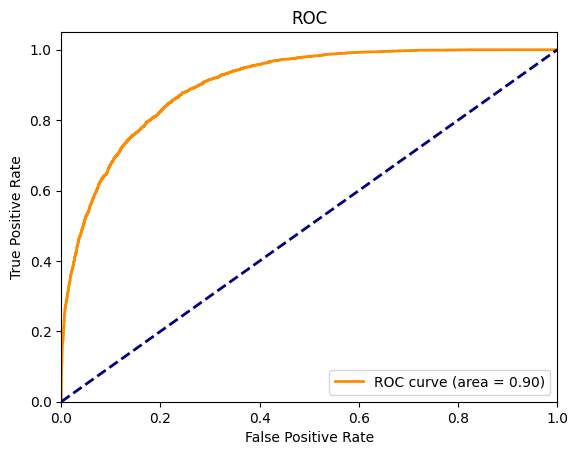

[0.808, 0.902, 0.895, 0.802, 0.783, 0.823, 0.696]

In [22]:
evaluator.eval_model(data, model_type = model_type, verbose=1)

# continuous

In [23]:
with open('./config_cont.json', 'r') as f:
    config = json.load(f)

data_path = config['data_path']
weights_path = config['weights_path']
prediction_path = config['prediction_path']

model_type = config['model_type']
tissue = config['tissue']
histones = config['histones']

batch_size = config['batch_size']
num_epochs = config['num_epochs']
lr = config['lr']
earlystop_thresh = config['earlystop_thresh']

In [ ]:
### use same data for binary ###
# data_dir = f'{data_path}/{tissue}/binary_cont'
# create_hdf5(data_dir,histones)

In [24]:
data = MyDataset(data_path,tissue,histones,batch_size)

In [25]:
model = Deep5hmC_cont(input_read_size=data.read_size)

In [26]:
trainer = Trainer(weights_path = weights_path, tissue = tissue, num_epochs=num_epochs, lr=lr, earlystop_thresh=earlystop_thresh)

In [27]:
trainer.fit(model = model, data = data, model_type = model_type)

[INFO] using GPU
[INFO] training the network...
[INFO] EPOCH: 1/5
Train loss: 4.418815
Val loss: 16.218536
[INFO] total time taken to train the model: 99.87s


In [29]:
evaluator = Evaluator(prediction_path = prediction_path, tissue = tissue, model=model, best_model = trainer.best_model)
#evaluator = Evaluator(prediction_path = prediction_path, tissue = tissue, model=model, best_model = f'../pretrained/Deep5hmC_cont.pth')

[INFO] resume best model...


In [30]:
evaluator.eval_model(data, model_type = model_type, verbose=1)

[INFO] evaluating network...
Test: MSE 13.999, R 0.757



(13.999, 0.757)

# gene expression

In [26]:
with open('./config_gene.json', 'r') as f:
    config = json.load(f)

data_path = config['data_path']
weights_path = config['weights_path']
prediction_path = config['prediction_path']

model_type = config['model_type']
tissue = config['tissue']
histones = config['histones']

batch_size = config['batch_size']
num_epochs = config['num_epochs']
lr = config['lr']
earlystop_thresh = config['earlystop_thresh']

In [3]:
# data_dir = f'{data_path}/{tissue}/gene'
# create_hdf5_gene(data_dir,histones)

In [4]:
data = MyDataset_gene(data_path,tissue,histones,batch_size)

In [27]:
model = Deep5hmC_gene(input_read_size=data.read_size) #Deep5hmC_gene = Deep5hmC_cont

In [28]:
evaluator = Evaluator(prediction_path = prediction_path, tissue = tissue, model=model, best_model = f'../weights/EB/Deep5hmC_cont.pth')

[INFO] resume best model...


In [29]:
evaluator.eval_model(data, model_type = model_type, verbose=1)

[INFO] evaluating network...
Test: MSE_5hmC 20.499, R_5hmC 0.929, MSE_GE 29.452, R_GE 0.501


(20.499, 0.929, 29.452, 0.501)

# diff

In [85]:
with open('./config_diff.json', 'r') as f:
    config = json.load(f)

data_path = config['data_path']
weights_path = config['weights_path']
prediction_path = config['prediction_path']

model_type = config['model_type']
tissue = config['tissue']
histones = config['histones']

batch_size = config['batch_size']
num_epochs = config['num_epochs']
lr = config['lr']
earlystop_thresh = config['earlystop_thresh']

In [86]:
# data_dir = f'{data_path}/{tissue}/diff'
# create_hdf5_diff(data_dir,histones)

In [87]:
data = MyDataset_diff(data_path,tissue,histones,batch_size=batch_size)

In [88]:
model = Deep5hmC_diff(input_read_size=data.read_size)

In [89]:
trainer = Trainer(weights_path = weights_path, tissue = tissue, num_epochs=num_epochs, lr=lr, earlystop_thresh=earlystop_thresh)

In [90]:
trainer.fit_diff(model,data)

[INFO] using GPU
[INFO] training the network...
[INFO] EPOCH: 1/5
Train loss: 0.717863, Train accuracy: 0.5122
Val loss: 1.365172, Val accuracy: 0.5984

[INFO] total time taken to train the model: 13.06s


In [91]:
evaluator = Evaluator(prediction_path = prediction_path, tissue = tissue, model=model, best_model = trainer.best_model)
#evaluator = Evaluator(prediction_path = prediction_path, tissue = tissue, model=model, best_model = f'../pretrained/Deep5hmC_diff.pth')

[INFO] resume best model...


[INFO] evaluating network...
Test: acc 0.642, auroc 0.688, auprc 0.739, f1 0.675, precision 0.661, recall 0.689, R 0.323



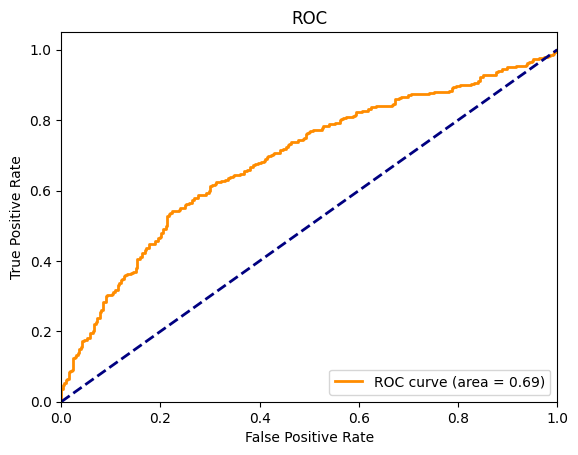

[0.642, 0.688, 0.739, 0.675, 0.661, 0.689, 0.323]

In [92]:
evaluator.eval_model(data, model_type = model_type, verbose=1)